# NSGA-II experiment

In [1]:
import random

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from deap import creator
from deap import base
from deap import tools
from deap.benchmarks.tools import hypervolume

import nsgaii.price as pr
import nsgaii.toolbox as tb
import nsgaii.search as sr
from nsgaii.battery import Battery

In [9]:
def visualize_results(pop, toolbox, actual):
    results = np.array([toolbox.evaluate(x) for x in pop])

    x = np.hstack([results, pop])
    filtered = x[np.where(x[:,2] <= 0.5)[0]]

    filtered_pop = filtered[:,3:]
    filtered_results = filtered[:,0:3]

    lowest_price = filtered[filtered[:,0].argmin(),:]
    lowest_mape  = filtered[filtered[:,1].argmin(),:]



    fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2,figsize=(12,8))
    for solution in filtered_pop:
        ax1.plot(solution)

    ax2.plot(lowest_price[3:], label='lowest price')
    ax2.plot(lowest_mape[3:], label='lowest mape')
    ax2.plot(actual, label='actual')
    ax2.legend()

    ax3.hist(filtered_results[:,2])

    ax4.scatter(filtered_results[:,0], filtered_results[:,1])
    
    print(lowest_price[0], lowest_mape[1], sum(actual))

In [3]:
creator.create('FitnessMin', base.Fitness, weights=(-1.0, -1.0, -1.0))
creator.create('Individual', list, fitness=creator.FitnessMin)

In [4]:
df = pd.read_csv('sample_data.csv', delimiter=',', names=['time','cons', 'pv', 'grid'])
actual = df['cons'].as_matrix()
pv   = df['pv'].as_matrix()

In [5]:
# dimenzionalita problemu, AKA pocet dimenzii
NDIM = 24
BOUND_LOW = 0
BOUND_UP = 10
GENS = 200

Final population hypervolume is 0.000000
0.0115251414938 11.427025304 9.66053333333


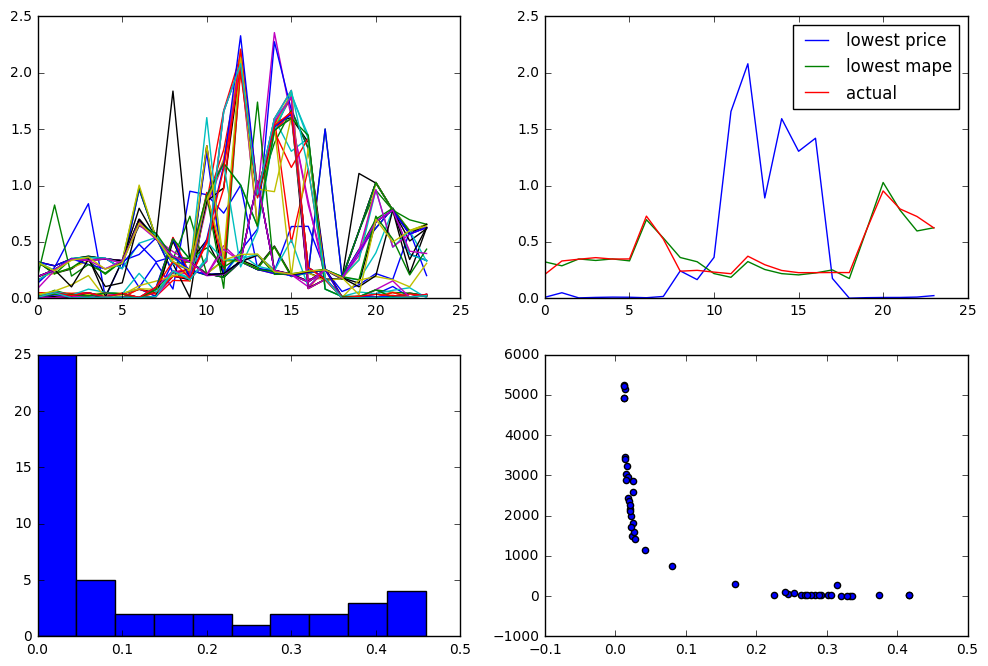

In [10]:
toolbox_wo_b = tb.setup(actual, pv, NDIM, BOUND_LOW, BOUND_UP)

pop_wo_b, logbook = sr.search(toolbox_wo_b, gens=GENS, verbose=False)

visualize_results(pop_wo_b, toolbox_wo_b, actual)

Final population hypervolume is 650.798873
0.0111925837944 5.55775838691 9.66053333333


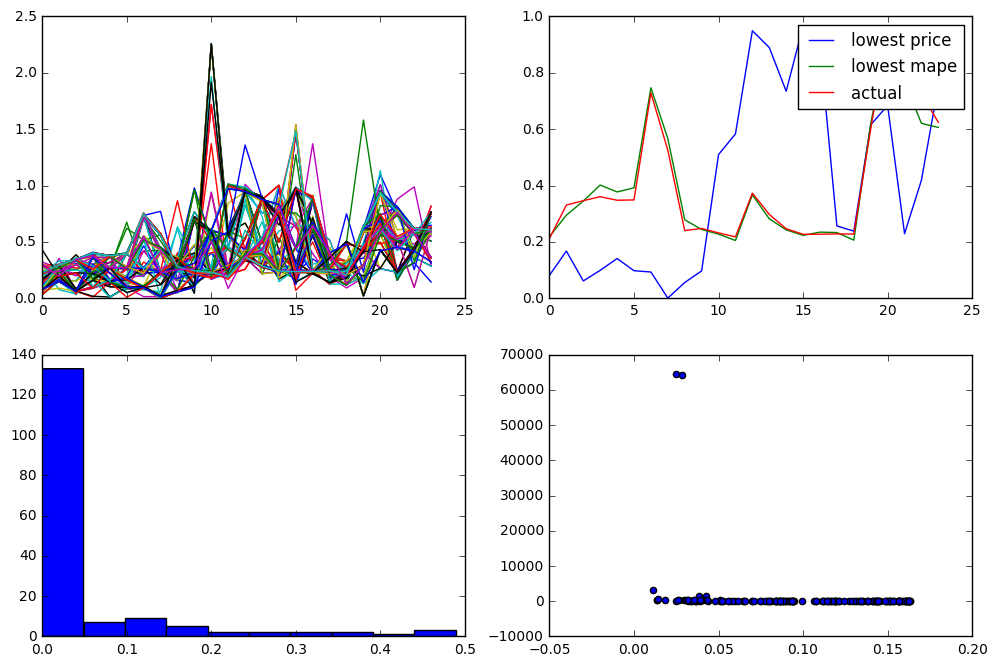

In [11]:
battery = Battery(3,0)

toolbox_b_3 = tb.setup(actual, pv, NDIM, BOUND_LOW, BOUND_UP, battery)

pop_b_3, logbook = sr.search(toolbox_b_3, gens=GENS, verbose=False)

visualize_results(pop_b_3, toolbox_b_3, actual)

Final population hypervolume is 1049.184859
0.0218883749623 2.32501219583 9.66053333333


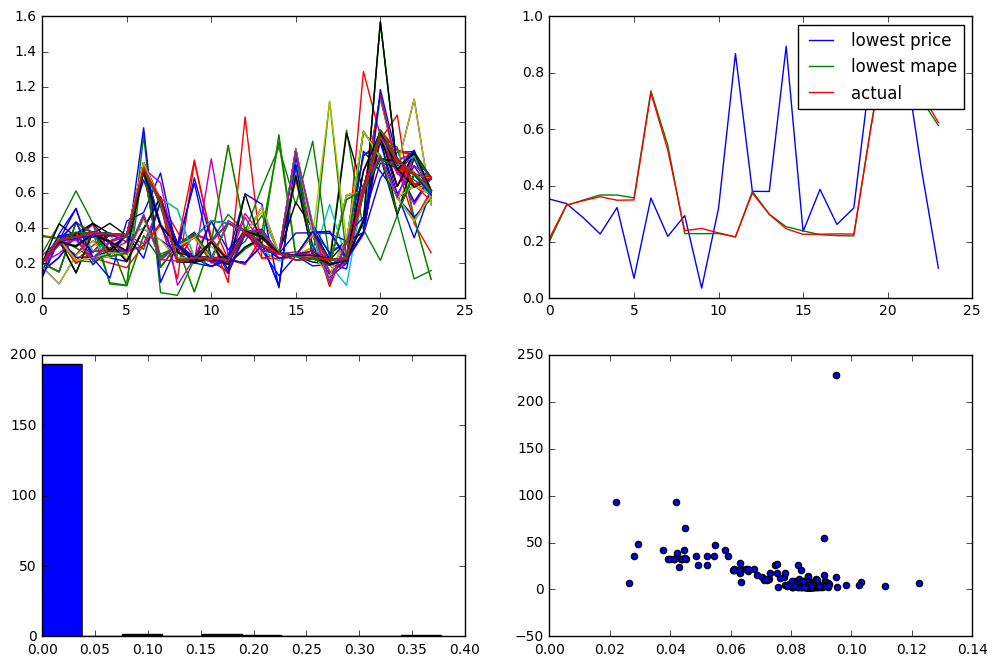

In [13]:
battery = Battery(5,0)

toolbox_b_10 = tb.setup(actual, pv, NDIM, BOUND_LOW, BOUND_UP, battery)

pop_b_10, logbook = sr.search(toolbox_b_10, gens=GENS, verbose=False)

visualize_results(pop_b_10, toolbox_b_10, actual)